# baseball

In [79]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [80]:
# loading the dataset
ball = pd.read_csv('baseball.csv')

In [81]:
# first 5 rows
ball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [82]:
# rows and columns
ball.shape

(30, 17)

we have 30 rows and 17 columns including the target column.

In [83]:

ball['W'].value_counts()

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

In [84]:
# data dypes
ball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [85]:
# ckecking columns name
ball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [86]:
# information of the dataset
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# summary statistics

In [87]:
ball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

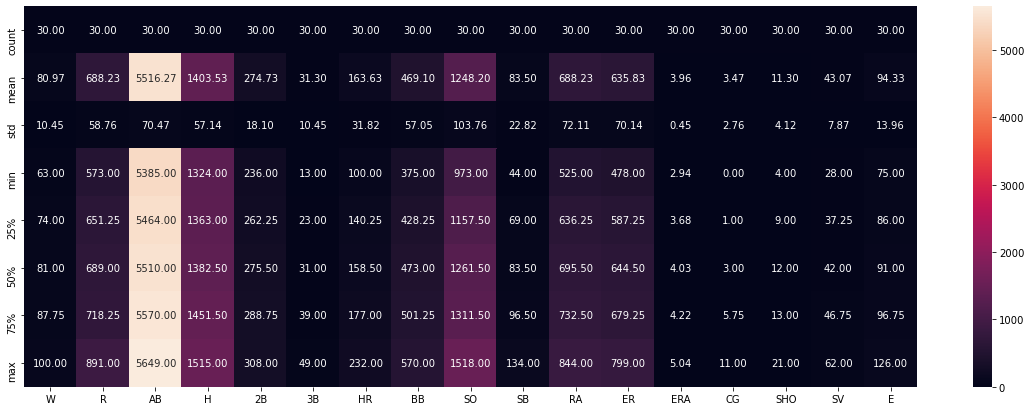

In [88]:
# apply heatmap visualisation with decribe
plt.figure(figsize=(20,7))
sns.heatmap(ball.describe(),annot=True,fmt='0.2f')

In [89]:
# checking null value in DataFrame
ball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

there are no null values

<AxesSubplot:>

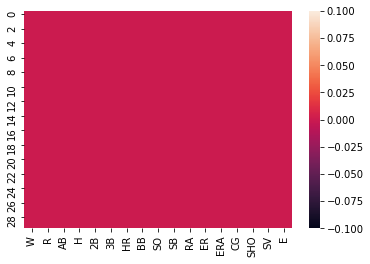

In [90]:
sns.heatmap(ball.isnull())

# correlation

In [91]:
ball_corr = ball.corr()
ball_corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

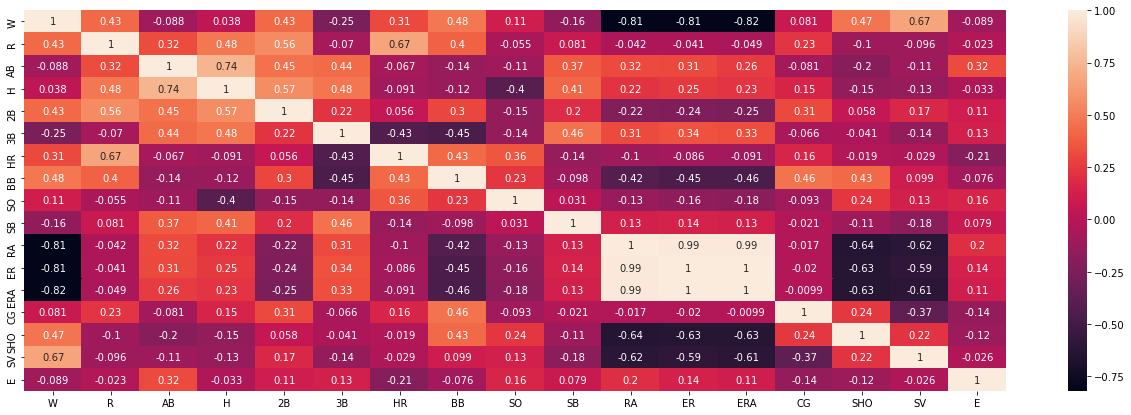

In [92]:
plt.figure(figsize=(22,7))
sns.heatmap(ball_corr,annot=True)


# Data Visualization

<AxesSubplot:xlabel='R', ylabel='W'>

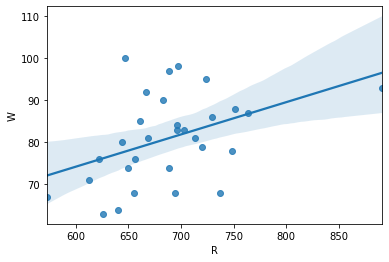

In [93]:
sns.regplot(x='R',y='W', data=ball)

<AxesSubplot:xlabel='AB', ylabel='W'>

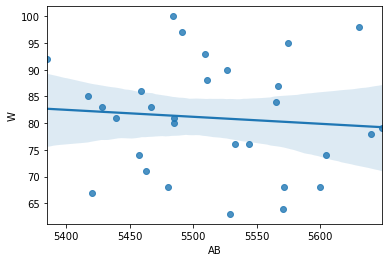

In [94]:
sns.regplot(x='AB',y='W',data=ball)

<AxesSubplot:xlabel='H', ylabel='W'>

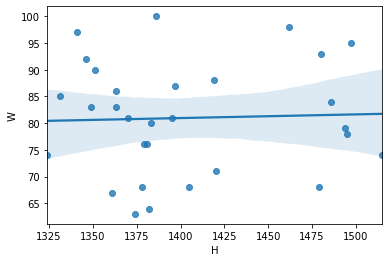

In [95]:
sns.regplot(x='H' ,y='W',data=ball)

<AxesSubplot:xlabel='2B', ylabel='W'>

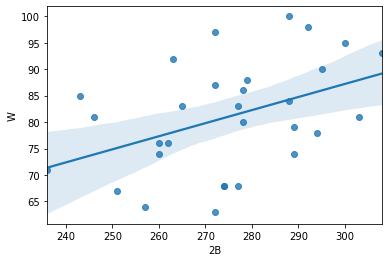

In [96]:
sns.regplot(x='2B' ,y="W",data=ball)

<AxesSubplot:xlabel='3B', ylabel='W'>

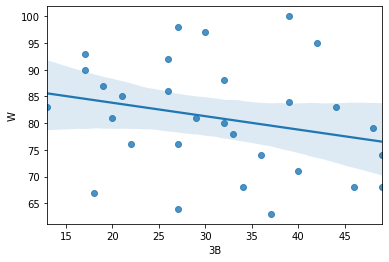

In [97]:
sns.regplot(x='3B' ,y='W' ,data=ball)

<AxesSubplot:xlabel='HR', ylabel='W'>

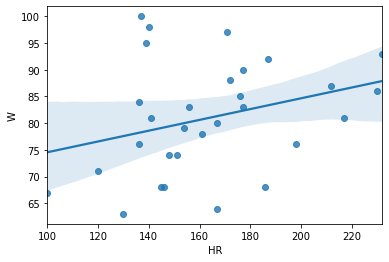

In [98]:
sns.regplot(x='HR' ,y='W' ,data=ball)

<AxesSubplot:xlabel='BB', ylabel='W'>

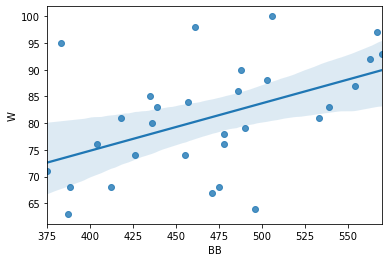

In [99]:
sns.regplot(x='BB' ,y="W",data=ball)

<AxesSubplot:xlabel='SO', ylabel='W'>

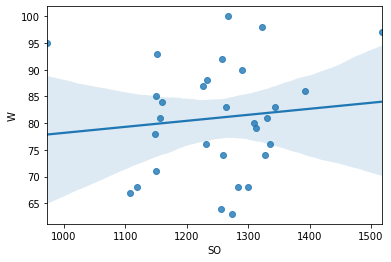

In [100]:
sns.regplot(x='SO' ,y="W",data=ball)

<AxesSubplot:xlabel='SB', ylabel='W'>

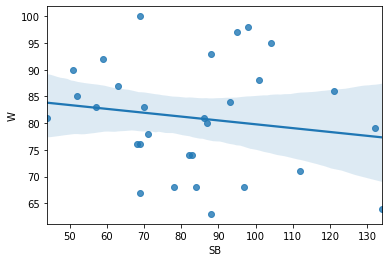

In [101]:
sns.regplot(x='SB',y="W",data=ball)

<AxesSubplot:xlabel='RA', ylabel='W'>

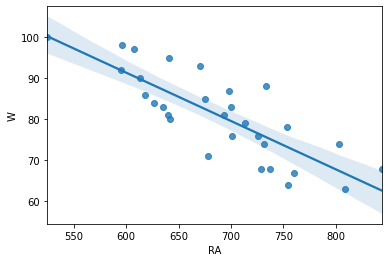

In [102]:
sns.regplot(x='RA' ,y='W' ,data=ball)

<AxesSubplot:xlabel='ERA', ylabel='W'>

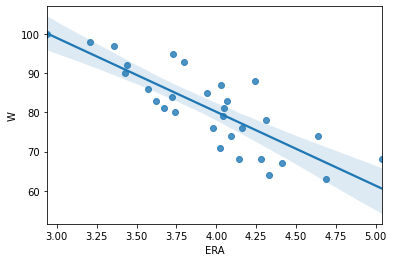

In [103]:
sns.regplot(x='ERA' ,y='W' ,data=ball)

<AxesSubplot:xlabel='CG', ylabel='W'>

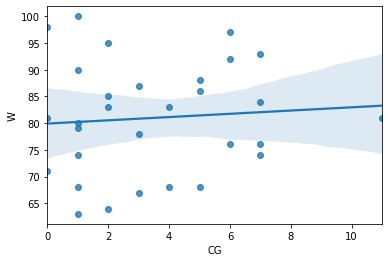

In [104]:
sns.regplot(x='CG' ,y='W' ,data=ball)

<AxesSubplot:xlabel='SHO', ylabel='W'>

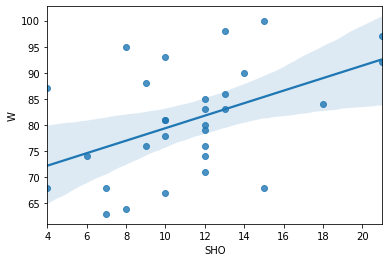

In [105]:
sns.regplot(x='SHO' ,y='W',data=ball)

<AxesSubplot:xlabel='SV', ylabel='W'>

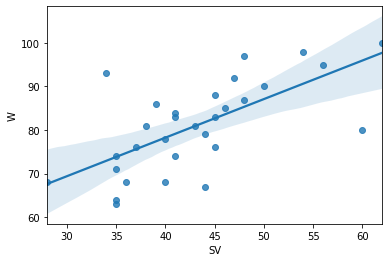

In [106]:
sns.regplot(x='SV' ,y='W' ,data=ball)

<AxesSubplot:xlabel='E', ylabel='W'>

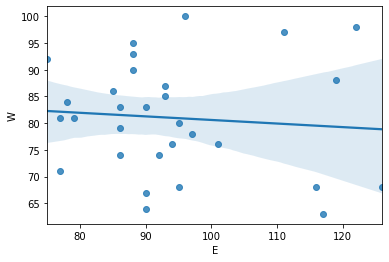

In [107]:
sns.regplot(x='E' ,y='W' ,data=ball)

# ckecking outliers 

<AxesSubplot:>

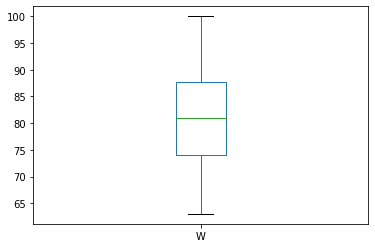

In [108]:
ball['W'].plot.box()

there are no outlier 

<AxesSubplot:>

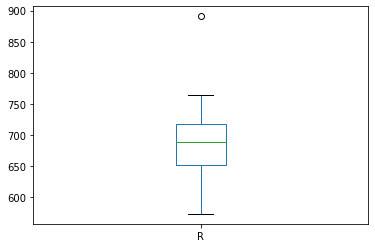

In [109]:
ball['R'].plot.box()

<AxesSubplot:>

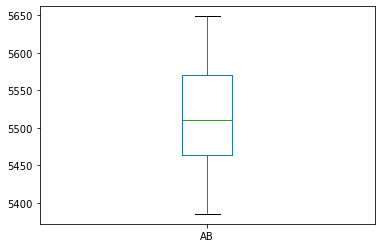

In [110]:
ball['AB'].plot.box()

<AxesSubplot:>

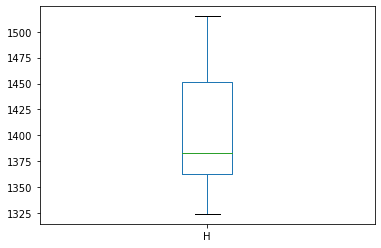

In [111]:
ball['H'].plot.box()

<AxesSubplot:>

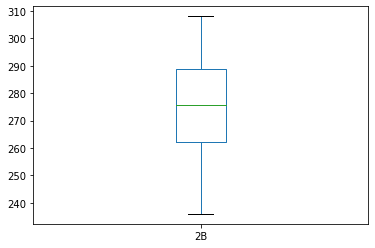

In [112]:
ball['2B'].plot.box()

<AxesSubplot:>

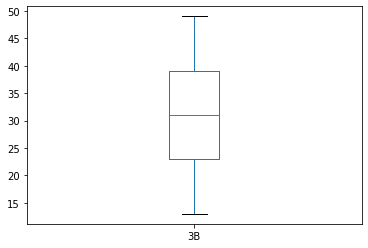

In [113]:
ball['3B'].plot.box()

<AxesSubplot:>

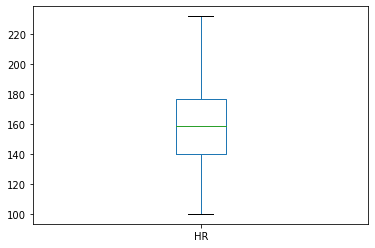

In [114]:
ball['HR'].plot.box()

<AxesSubplot:>

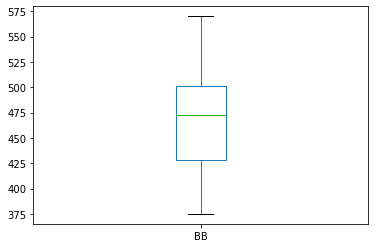

In [115]:
ball['BB'].plot.box()

<AxesSubplot:>

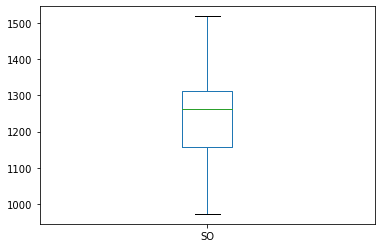

In [116]:
ball['SO'].plot.box()

<AxesSubplot:>

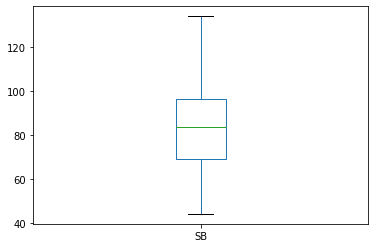

In [117]:
ball['SB'].plot.box()

<AxesSubplot:>

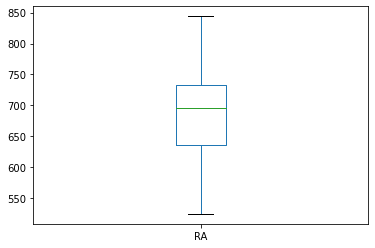

In [118]:
ball['RA'].plot.box()

<AxesSubplot:>

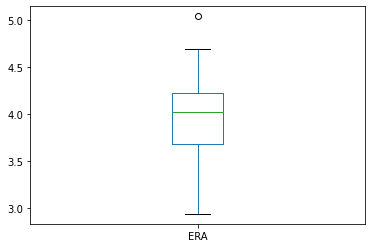

In [119]:
ball['ERA'].plot.box()

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

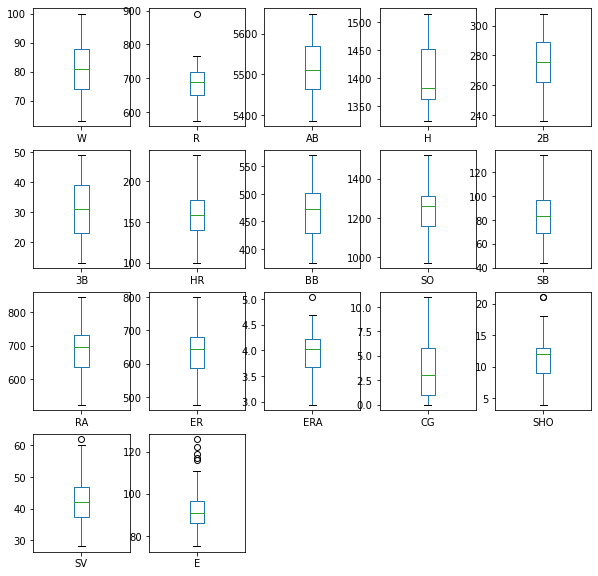

In [120]:
ball.plot(kind='box',subplots=True ,layout = (4,5), figsize = (10,10))

In [121]:
from scipy.stats import zscore
z= np.abs(zscore(ball))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [122]:
threshold = 3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [123]:
ball_new = ball[(z<3).all(axis=1)]

In [124]:
ball_new.shape

(29, 17)

In [125]:
ball.shape

(30, 17)

# Checking skewness

<AxesSubplot:xlabel='W', ylabel='Density'>

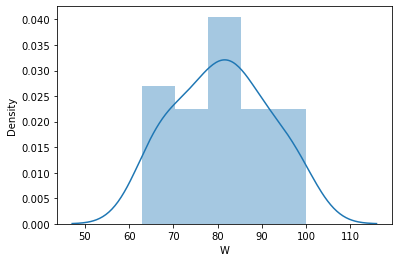

In [126]:
sns.distplot(ball['W'])

<AxesSubplot:xlabel='R', ylabel='Density'>

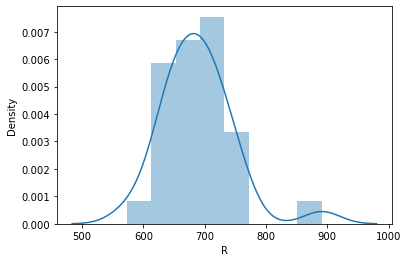

In [127]:
sns.distplot(ball['R'])

<AxesSubplot:xlabel='AB', ylabel='Density'>

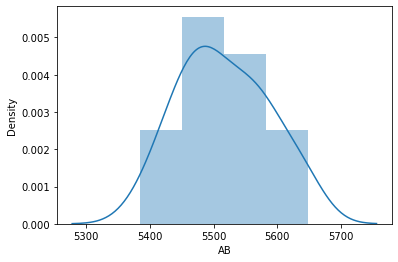

In [128]:
sns.distplot(ball['AB'])

<AxesSubplot:xlabel='H', ylabel='Density'>

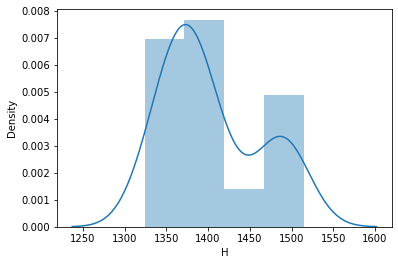

In [129]:
sns.distplot(ball['H'])

<AxesSubplot:xlabel='2B', ylabel='Density'>

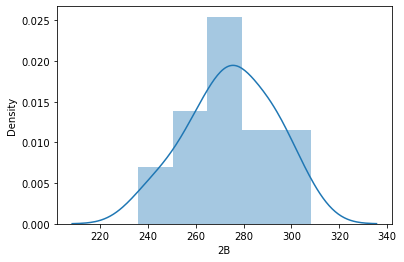

In [130]:
sns.distplot(ball['2B'])

<AxesSubplot:xlabel='3B', ylabel='Density'>

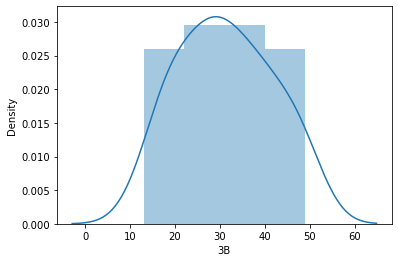

In [131]:
sns.distplot(ball['3B'])

<AxesSubplot:xlabel='HR', ylabel='Density'>

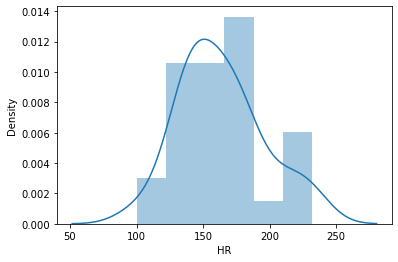

In [132]:
sns.distplot(ball['HR'])

<AxesSubplot:xlabel='SO', ylabel='Density'>

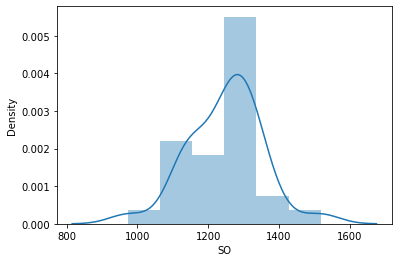

In [133]:
sns.distplot(ball['SO'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

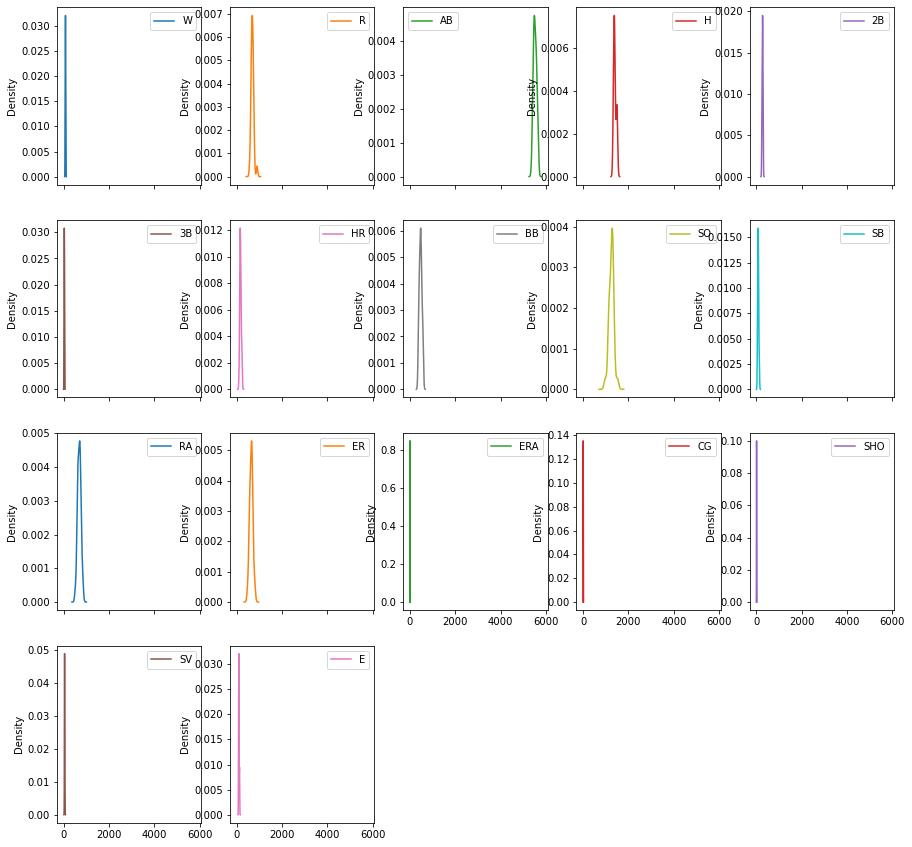

In [134]:
ball.plot(kind='kde', subplots=True, layout=(4,5), figsize=(15,15))

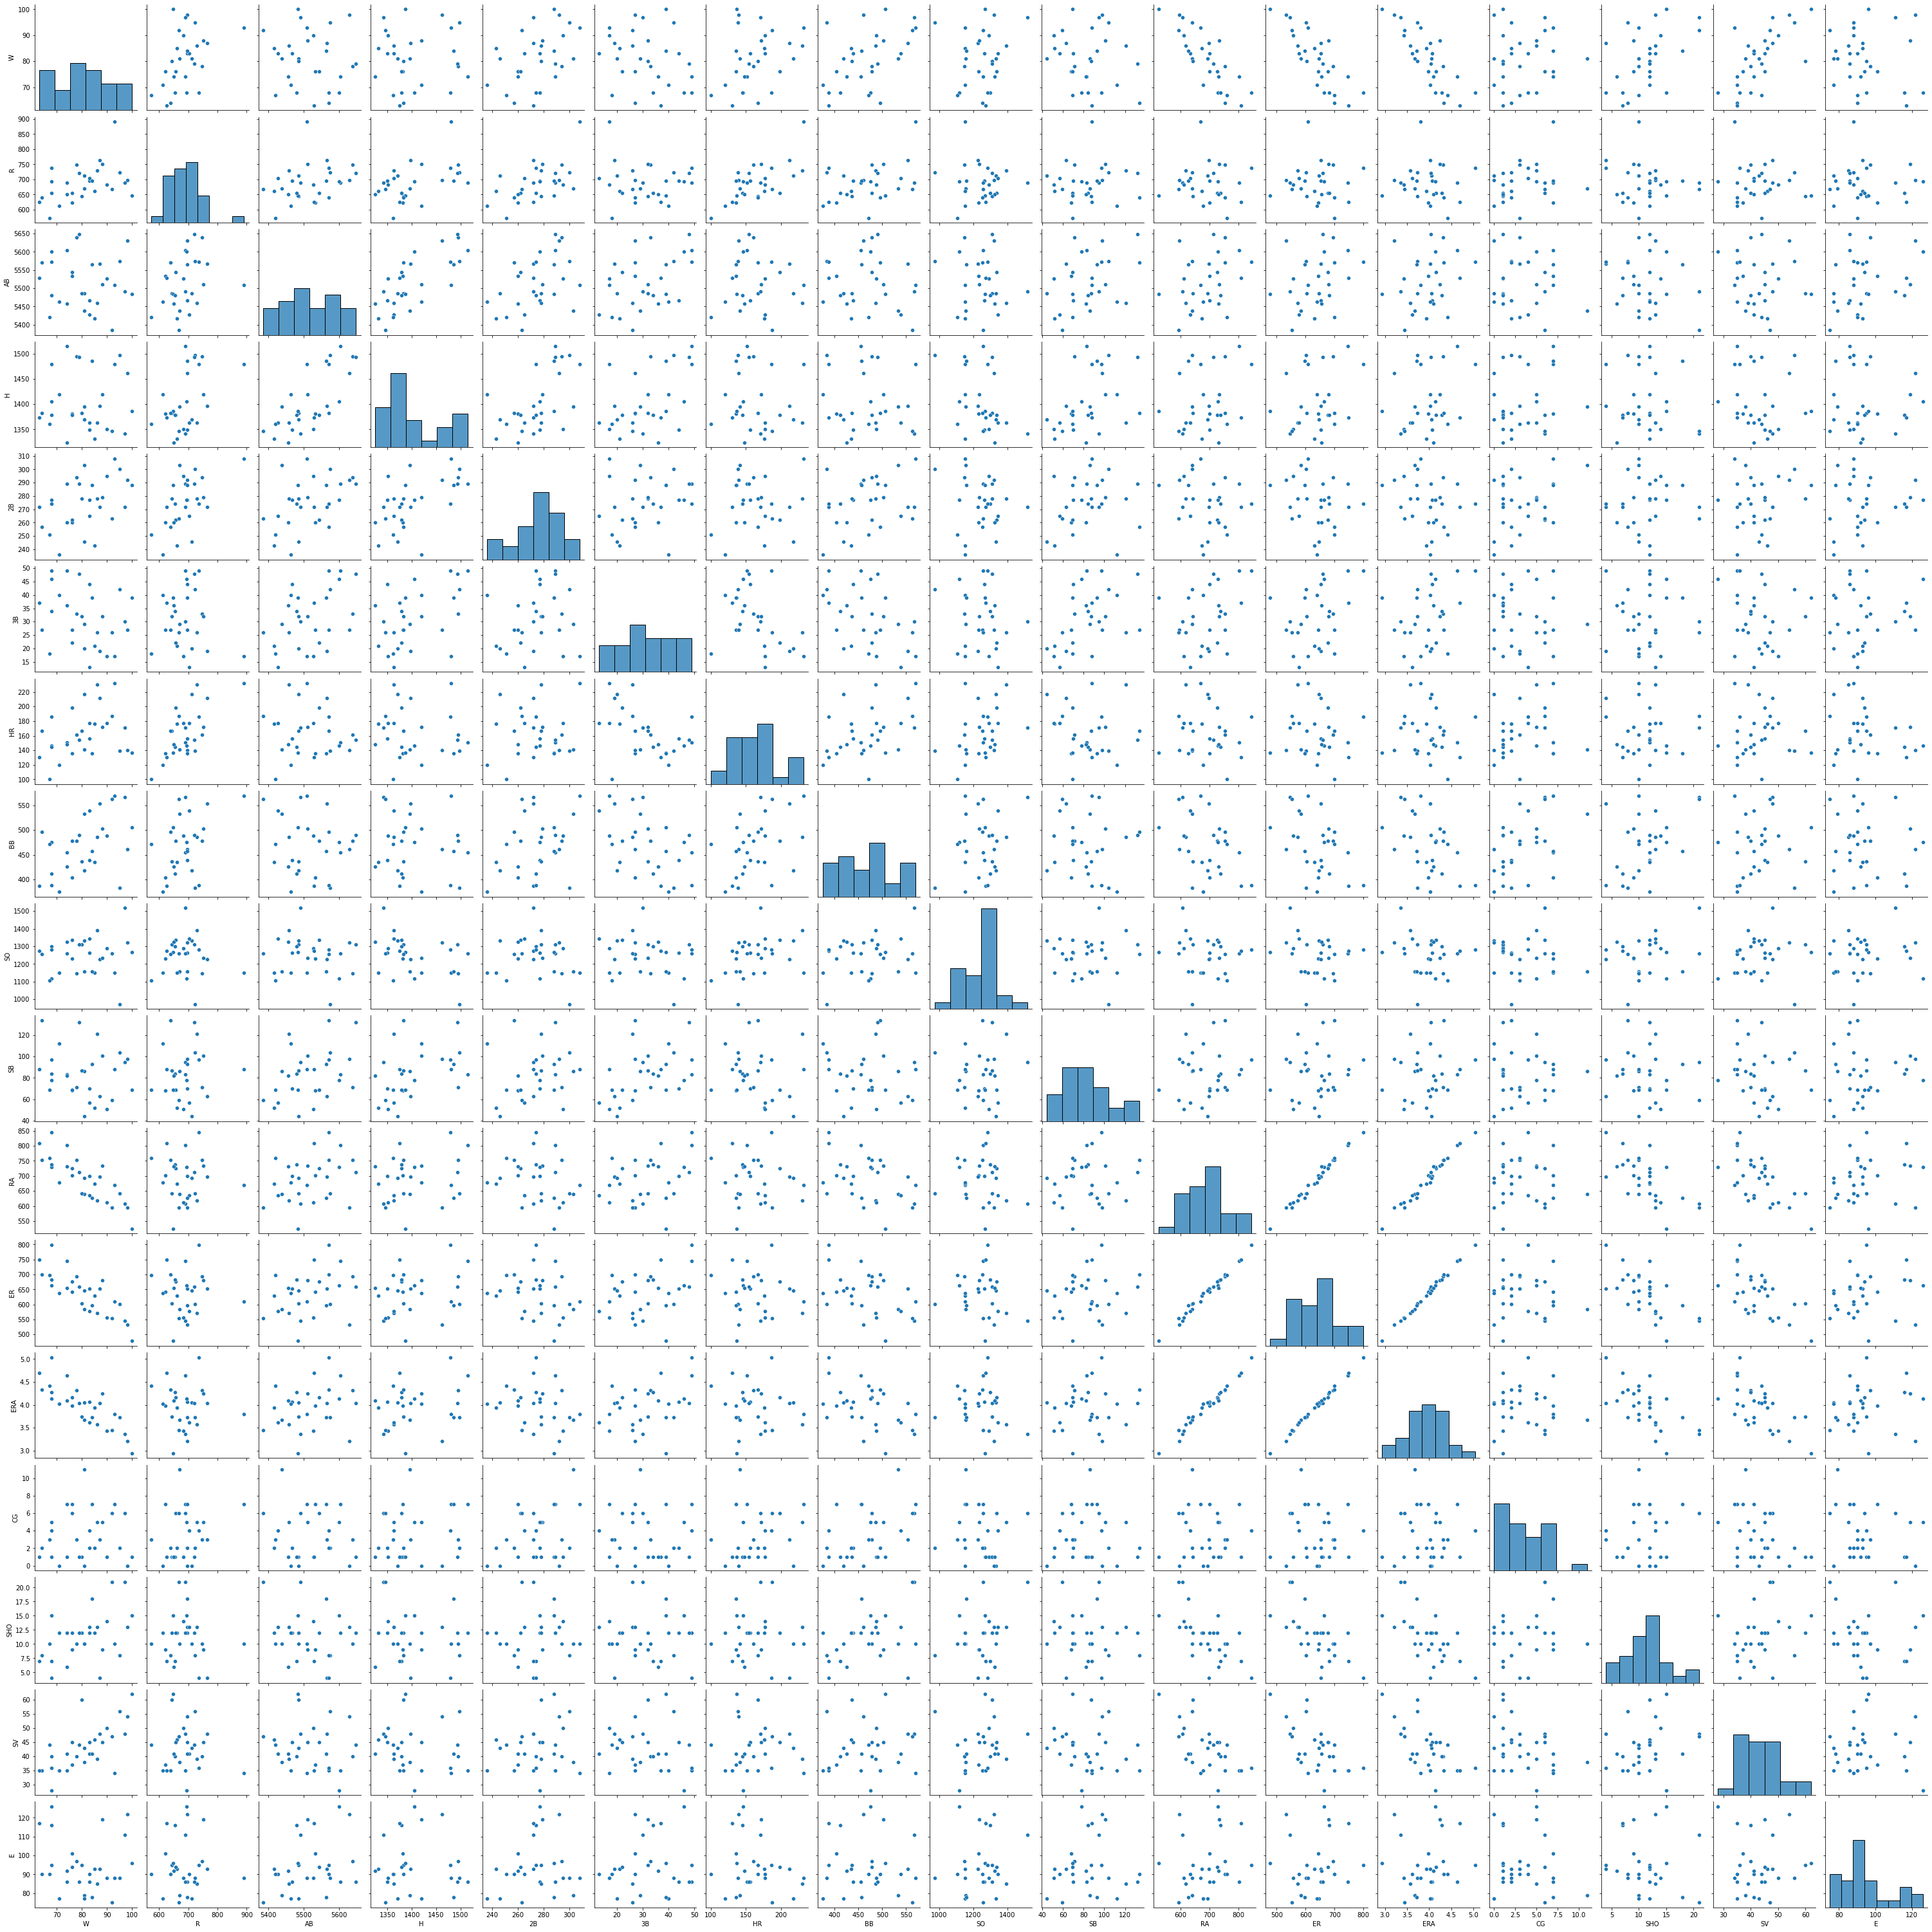

In [135]:
sns.pairplot(ball)

In [136]:
# independent columns
x = ball.iloc[:,1:]

In [137]:
#target
y = ball.iloc[:,:1]

In [138]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[ 0.        ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.66033096,
        -0.49742469, -0.50089346, -0.35984364, -0.78957937,  1.546378  ,
        -0.3349525 ],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.17546536,
         0.25797351,  0.26180619, -0.35984364,  0.25177537,  0.36044386,
        -0.53221128],
       [ 0.        ,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.67462053,
        -0.74690639, -0.63645949,  1.99351257, -0.24539345, -0.6075936 ,
        -1.34233137],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.18951225,
         0.11357524,  0.06080381,  1.22010317, -0.51075929, -0.76445333,
         0.67852361],
       [ 0.        ,  0.        ,  0

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= .30 ,random_state=45)

# LinearRegression

In [140]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print('Actual win',y_test)
print('Predict win',predlr)


Actual win      W
16  98
27  79
25  92
5   93
13  76
9   78
29  68
7   81
10  88
Predict win [[87.33827313]
 [78.74409026]
 [97.16042152]
 [81.26930706]
 [83.68641426]
 [76.15945797]
 [66.23198507]
 [81.18066548]
 [78.79990406]]


In [141]:
lr.coef_

array([[ 0.00000000e+00,  3.55271368e-15,  8.88178420e-16,
        -7.34883051e-01,  2.61886842e+00,  3.45520364e+00,
        -4.56525877e-01, -1.30286809e+00, -1.23191998e+00,
         7.81799481e+00, -3.50632978e+00, -9.89275184e+00,
         2.58266501e+00,  7.32076125e-01,  5.14172809e+00,
        -9.34270287e-01]])

In [142]:
lr.intercept_

array([80.21901729])

In [143]:
print('error')

print('mean absolute error :', mean_absolute_error(y_test,predlr))
print('mean squared error :',mean_squared_error(y_test,predlr))
print('mean r2_score :' ,r2_score(y_test,predlr))

error
mean absolute error : 5.387164855918891
mean squared error : 47.58287311432087
mean r2_score : 0.4259438900417053


# DecisionTreeRegressor

In [144]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print('Actual win',y_test)
print('Predict win',preddt)


Actual win      W
16  98
27  79
25  92
5   93
13  76
9   78
29  68
7   81
10  88
Predict win [100.  76.  97.  71.  74.  67.  63.  85.  68.]


In [145]:
print('error')

print('mean absolute error :', mean_absolute_error(y_test,preddt))
print('mean squared error :',mean_squared_error(y_test,preddt))
print('mean r2_score :' ,r2_score(y_test,preddt))

error
mean absolute error : 8.222222222222221
mean squared error : 120.88888888888889
mean r2_score : -0.4584450402144773


# SVR

In [146]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
predsvr = svr.predict(x_test)
print('Actual win',y_test)
print('Predict win',predsvr)


Actual win      W
16  98
27  79
25  92
5   93
13  76
9   78
29  68
7   81
10  88
Predict win [80.92302235 79.44946455 81.80378443 80.91127973 80.37552498 78.80162312
 78.62409036 80.63099078 78.83110221]


In [147]:
print('error')

print('mean absolute error :', mean_absolute_error(y_test,predsvr))
print('mean squared error :',mean_squared_error(y_test,predsvr))
print('mean r2_score :' ,r2_score(y_test,predsvr))

error
mean absolute error : 7.238947057675923
mean squared error : 84.30990253498402
mean r2_score : -0.017143596266563144


# cross_val_score

In [148]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,x,y, cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.06571936 -7.82824427 -0.83244478 -0.30172684  0.81893491]
-1.641840070331752
3.1388593842967647


# Ensemble Technique

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':["auto",'sqrt',"log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)


{'criterion': 'mse', 'max_features': 'auto'}


In [150]:
rf = RandomForestRegressor(criterion='mae',max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score',rfc*100)

R2 Score 32.8656032171582
Cross Val Score -85.14268374283279


# save model

In [153]:
import joblib
joblib.dump(dt,"baseball.pkl")

['baseball.pkl']